In [2]:
#Lab program 9:
#Back Propagation

import numpy as np # numpy is commonly used to process number array
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # Features ( Hrs Slept, Hrs Studied)
y = np.array(([92], [86], [89]), dtype=float) # Labels(Marks obtained)
X = X/np.amax(X,axis=0) # Normalize
y = y/100
def sigmoid(x):
 return 1/(1+np.exp(-x))
def sigmoid_grad(x):
 return x * (1 - x)
# Variable initialization
epoch=1000 #Setting training iterations
eta =0.2 #Setting learning rate (eta)
input_neurons = 2 #number of features in data set
hidden_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons)) # 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) # 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) # 1x1
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
#Forward Propogation
    h_ip=np.dot(X,wh) + bh # Dot product + bias
    h_act = sigmoid(h_ip) # Activation function
    o_ip=np.dot(h_act,wout) + bout
output = sigmoid(o_ip)
#Backpropagation
# Error at Output layer
Eo = y-output # Error at o/p
outgrad = sigmoid_grad(output)
d_output = Eo* outgrad # Errj=Oj(1-Oj)(Tj-Oj)
# Error at Hidden later
Eh = d_output.dot(wout.T) # .T means transpose
hiddengrad = sigmoid_grad(h_act) # How much hidden layer wts contributed to error
d_hidden = Eh * hiddengrad
wout += h_act.T.dot(d_output) *eta # Dotproduct of nextlayererror and currentlayerop
wh += X.T.dot(d_hidden) *eta
print("Normalized Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Normalized Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.82733644]
 [0.81810866]
 [0.83140634]]


In [1]:
# Lab Program 8:
#Program implementing Genetic Alogorithm.

import random 

# Number of individuals in each generation 
POPULATION_SIZE = 100

# Valid genes 
GENES = '''abcdefghijklmnopqrstuvwxyzABCFGHIJKLMNOP 
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generate
TARGET = input(" Enter target string :\n")

class Individual(object): 
	''' 
	Class representing individual in population 
	'''
	def __init__(self, chromosome): 
		self.chromosome = chromosome 
		self.fitness = self.cal_fitness() 

	@classmethod
	def mutated_genes(self): 
		''' 
		create random genes for mutation 
		'''
		global GENES 
		gene = random.choice(GENES) 
		return gene 

	@classmethod
	def create_gnome(self): 
		''' 
		create chromosome or string of genes 
		'''
		global TARGET 
		gnome_len = len(TARGET) 
		return [self.mutated_genes() for _ in range(gnome_len)] 

	def mate(self, par2): 
		''' 
		Perform mating and produce new offspring 
		'''

		# chromosome for offspring 
		child_chromosome = [] 
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):	 

			# random probability 
			prob = random.random() 

			# if prob is less than 0.45, insert gene 
			# from parent 1 
			if prob < 0.45: 
				child_chromosome.append(gp1) 

			# if prob is between 0.45 and 0.90, insert 
			# gene from parent 2 
			elif prob < 0.90: 
				child_chromosome.append(gp2) 

			# otherwise insert random gene(mutate), 
			# for maintaining diversity 
			else: 
				child_chromosome.append(self.mutated_genes()) 

		# create new Individual(offspring) using 
		# generated chromosome for offspring 
		return Individual(child_chromosome) 

	def cal_fitness(self): 
		''' 
		Calculate fitness score, it is the number of 
		characters in string which differ from target 
		string. 
		'''
		global TARGET 
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET): 
			if gs != gt: fitness+= 1
		return fitness 

# Driver code 
def main(): 
	global POPULATION_SIZE 

	#current generation 
	generation = 1

	found = False
	population = [] 

	# create initial population 
	for _ in range(POPULATION_SIZE): 
				gnome = Individual.create_gnome() 
				population.append(Individual(gnome)) 

	while not found: 

		# sort the population in increasing order of fitness score 
		population = sorted(population, key = lambda x:x.fitness) 

		# if the individual having lowest fitness score ie. 
		# 0 then we know that we have reached to the target 
		# and break the loop 
		if population[0].fitness <= 0: 
			found = True
			break

		# Otherwise generate new offsprings for new generation 
		new_generation = [] 

		# Perform Elitism, that mean 10% of fittest population 
		# goes to the next generation 
		s = int((10*POPULATION_SIZE)/100) 
		new_generation.extend(population[:s]) 

		# From 50% of fittest population, Individuals 
		# will mate to produce offspring 
		s = int((90*POPULATION_SIZE)/100) 
		for _ in range(s): 
			parent1 = random.choice(population[:50]) 
			parent2 = random.choice(population[:50]) 
			child = parent1.mate(parent2) 
			new_generation.append(child) 

		population = new_generation 

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation, 
			"".join(population[0].chromosome), 
			population[0].fitness)) 

		generation += 1

	
	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation, 
		"".join(population[0].chromosome), 
		population[0].fitness)) 

if __name__ == '__main__': 
	main() 


 Enter target string :
 srinadh


Generation: 1	String: 
v$$ax9	Fitness: 6
Generation: 2	String: m%c!ad=	Fitness: 5
Generation: 3	String: m%c!ad=	Fitness: 5
Generation: 4	String: _r,}ado	Fitness: 4
Generation: 5	String: _r,}ado	Fitness: 4
Generation: 6	String: _rinadX	Fitness: 2
Generation: 7	String: _rinadX	Fitness: 2
Generation: 8	String: _rinadX	Fitness: 2
Generation: 9	String: _rinadX	Fitness: 2
Generation: 10	String: -rinadh	Fitness: 1
Generation: 11	String: -rinadh	Fitness: 1
Generation: 12	String: -rinadh	Fitness: 1
Generation: 13	String: -rinadh	Fitness: 1
Generation: 14	String: -rinadh	Fitness: 1
Generation: 15	String: -rinadh	Fitness: 1
Generation: 16	String: -rinadh	Fitness: 1
Generation: 17	String: -rinadh	Fitness: 1
Generation: 18	String: srinadh	Fitness: 0


In [4]:
# Lab Program 7:

'''
IMPLEMENT NAÏVEBAYES THEOREM TO CLASSIFY THE ENGLISH TEXT 
'''

#Naive's Bayes Theroem for text Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data=pd.read_csv('text.csv')
x=data['message']
y=data['label']
#Splitting data into test and train datasets.
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Counting tokens in messages
count = CountVectorizer()
xtrain_token = count.fit_transform(x_train)
xtest_token=count.transform(x_test)

# Training Naive Bayes (NB) classifier on training data.
model = MultinomialNB().fit(xtrain_token,y_train)
# Future Goal : Triying to utilize the NB for dynamic text analyzer
'''text=input("Enter text :")
text_token=count_vect.fit_transform(text)
'''
predicted = model.predict(xtest_token)
print("Feature Matrix :\n",x_test)
print("Response Vector :\n",predicted)

# Predicting Statement
statement=[input("Enter your statement :")]
statement_token=count.transform(statement)
predict_token=model.predict(statement_token)
for message,label in zip(statement,predict_token):
    print(label)


Feature Matrix :
 2     I feel very good about these beers 
0                   I love this sandwich 
1               This is an amazing place 
8                   He is my sworn enemy 
14                  What a great holiday 
Name: message, dtype: object
Response Vector :
 [1 1 1 0 1]


Enter your statement : I hate banana


0


[87, 18, 59, 21, 49, 46, 24, 77, 91, 90]
[49, 75, 59, 65, 99, 82, 37, 95, 72, 70]
Predicted values : [72.83546426325718, 67.15536575141479, 70.53049675120519, 67.4023265562775, 69.70729406832949, 69.46033326346678, 67.64928736114022, 72.01226158038146, 73.16474533640746, 73.08242506811989]


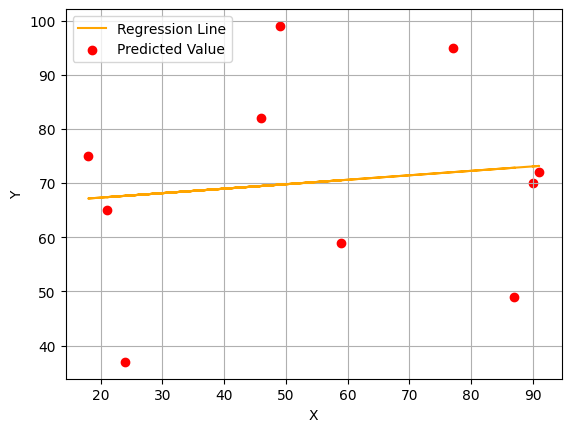

In [4]:
# Lab Program 6:
'''
IMPLEMENT LINEAR REGRESSION USING  PYTHON.
'''

#linear Regression
from scipy import stats
import matplotlib.pyplot as plt
import random
x=[random.randint(1,100) for _ in range(10)]
y=[random.randint(1,100) for _ in range(10)]
print(x)
print(y)
result=stats.linregress(x,y)
def fun(x):
    return result.slope*x+result.intercept
model = list(map(fun, x))
print("Predicted values :",model)

# Graphical representation (Optional code)
plt.plot(x,model,color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y,color="red")
plt.grid(True, linestyle='-', alpha=1)
plt.legend(['Regression Line','Predicted Value'])
plt.show()

In [2]:
# Lab Program 5:
'''
The Following Training Examples Map Descriptions Of Individuals Onto High,Medium And Low Credit-Worthiness.
'''

#Conditional and Unconditional Probabilty

'''
Unconditional Probability:

P(A)=fav_outcomes/Total_outcomes

Conditional Probability

P(A|B) = A happening B happened

'''
import pandas
data= pandas.read_csv('probability.csv')
print(data)
#uncodtional Probability of golf
golf=4/10
print("Unconditional Probability of GOLF :",golf)

# Here we gonna use Baye's theorem for  conditional probability
prob_single=2/10
prob_medrisk=3/10

# According to baye's theorem P(S|medrsik)=P(S) intersection P(medrisk)/P(medrisk)

P_SM=(prob_single*prob_medrisk)/prob_medrisk
print("Conditional Probabilty of Single for given MediRisk :",P_SM)



        Column1    Column2       Column3    Column4    Column5 Column6  \
0           NaN        NaN           NaN        NaN        NaN     NaN   
1   medium       skiing     design        single     twenties    no      
2     high       golf       trading       married    forties     yes     
3     low        speedway   transport     married    thirties    yes     
4     medium     football   banking       single     thirties    yes     
5     high       flying     media         married    fifties     yes     
6     low        football   security      single     twenties    no      
7     medium     golf       media         single     thirties    yes     
8     medium     golf       transport     married    forties     yes     
9     high       skiing     banking       single     thirties    yes     
10    low        golf       unemployed    married    forties     yes     

      Column7  
0         NaN  
1   highRisk   
2    lowRisk   
3    medRisk   
4    lowRisk   
5   highRisk   

In [21]:
#Lab program 4 : 

'''
Given the following data, which specify classifications for nine combinations of VAR1 and VAR2 
predict a classification for a case where VAR1=0.906 and VAR2=0.606, using the result of k-means clustering with 3means (i.e.,3centroids)
'''

# Classifications among the instaces using Kmeans with 3 means
from sklearn.cluster import KMeans
#import numpy as np
import pandas
data=pandas.read_csv('Kmeans.csv')
#print("CSV FILE :\n",data)
contraints=['VAR1','VAR2']
constraint_data=data[contraints]
  
result_data=data["CLASS"]
model=KMeans(n_clusters=3).fit(constraint_data,result_data)
value1=eval(input("value 1 :"))
value2=eval(input("value 2 :"))
print(model.predict([[value1,value2]]))

value 1 : 0.906
value 2 : 0.606


[0]


C:\Users\SRINADH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [16]:
#lab Program 3: Implementing K- nearest algorithm.

#Import necessary modules from sklearn.neighbors 
#from sklearn.model_selection import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris

# Loading data 
irisData =load_iris()
 
#Create feature and target arrays 
X=irisData.data
y=irisData.target

#Split into training and test set
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state=10) 
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print(knn.predict(X_test))


[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [ ]:
#Lab Program 2 : Implementing Databse using Python

# NOTE :If the database is from XXAMP , Exceute program using NOtepad or Visual Studio
import mysql.connector
from mysql.connector import Error
def select_query(user1,password1,database1,sql1):
		try:
				connection=mysql.connector.connect(host='localhost',database=database1,charset='utf8',user=user1,password=password1)
				print("Database connected")
				cursor = connection.cursor()
				cursor.execute(sql1)
				records = cursor.fetchall()
				print("Total number of rows : ", cursor.rowcount)
				print("\nPrinting each record")
				print("Number\tName")
				for row in records:
					print("{}{}".format(str(row[0]).ljust(7),row[1]))
		except Error as e:
			print("Error reading data from MySQL table", e)
			connection.close()
			cursor.close()
			print("MySQL connection is closed")
def insert_query(user1,password1,database1,sql1):

		try:
				mydb = mysql.connector.connect(host='localhost',database=database1,charset='utf8',user=user1,password=password1)
				mycursor = mydb.cursor()
				mycursor.execute(sql1)
				mydb.commit()
				print(mycursor.rowcount, "was inserted.")
		except Error as e:
				print("Error reading data from MySQL table", e)
		finally:
				if mydb.is_connected():
					mydb.close()
					print("MySQL connection is closed")
def delete_query(user1,password1,database1,sql1):
	mydb = mysql.connector.connect(host="localhost",user=user1,password=password1,database=database1)

	mycursor = mydb.cursor()

	mycursor.execute(sql1)

	mydb.commit()

	print(mycursor.rowcount, "record(s) deleted")
	mydb.close()
	print("Connection is Closed")


if __name__=="__main__":
	database=input("Database Name :")
	user=input("User Name :")
	password=input("Password : ")
	while True:
		sql_query=input("query >")
		if "insert" in sql_query:
			insert_query(user,password,database,sql_query)
		elif "select" in sql_query:
			select_query(user,password,database,sql_query)
		elif "delete" in sql_query:
			delete_query(user,password,database,sql_query)
		elif "exit" in sql_query:
			print("query > Returning.......")
			exit(0)
		else :
			print("query > Inavalid")


		



In [ ]:
#lab Program 1 :
#P(A|B) = A happening and B happened
#P(B|A) = B happening and A happened
print("Keep 1 if value is not available\nProvide only digits. Don't provide Percentile.")
A=eval(input("Enter Probability of A :"))
B=eval(input("Enter Probability of B :"))
AB=eval(input("Enter Probability of A|B intersection A|B  :"))
C=A*B #intersection of A and B
choice=  int(input("1.P(A|B)\n2.P(B|A)\n3.P(A)\n4.P(B)"))
if choice == 1:
  PA_B=(C/B)*100
  print("The Probality is {} % ".format(PA_B))
elif choice == 2:
  PB_A=(C/A)*100
  print("The Probality is {} % ".format(PB_A))
elif choice == 3:
  PA = (AB/B)*100
  print("The Probality is {} % ".format(PA))
elif choice == 4:
  PB = (AB/A)*100
  print("The Probality is {} % ".format(PB))  
else :
  print("Inavlid Choice.")